In [35]:
import os
import rasterio
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def load_tif(file):
    with xr.open_dataarray(file, engine="rasterio") as ds:
        return ds

In [1]:
data_path = '/Users/anna.jungbluth/Desktop/git/iecdt_ai4eo/data/iecdt/oxfordshire_partitions_aschips_2c696f57ca1c0/'

In [7]:
s2_path = data_path + 's2-2020/'
s1_path = data_path + 's1grd-2020/'
esawc_path = data_path + 'esaworldcover-2020/'
veg_path = data_path + 'modis44b006veg/'
treecover_path = data_path + 'treecover2020/'

s2_tiles = os.listdir(data_path + 's2-2020')

In [88]:
random_tile = np.random.choice(s2_tiles)

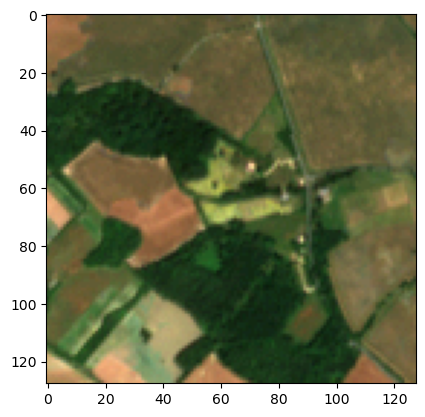

In [89]:
vars = ['summer_B4', 'summer_B3', 'summer_B2']

ds = load_tif(s2_path + random_tile)
idx = [list(ds.long_name).index(v) for v in vars]

ds = ds.isel(band=idx)
arr = ds.compute().values
arr = arr / np.nanmax(arr)
arr = np.moveaxis(arr, 0, -1)

plt.imshow(arr)

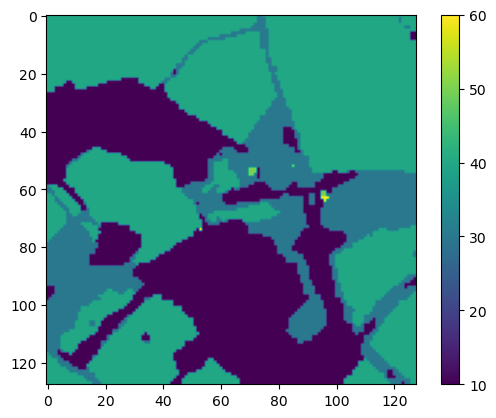

In [90]:
ds = load_tif(esawc_path + random_tile)
arr = ds.compute().values
arr = np.moveaxis(arr, 0, -1)

plt.imshow(arr)
plt.colorbar()

Text(0.5, 1.0, 'Percent Tree Cover 2020')

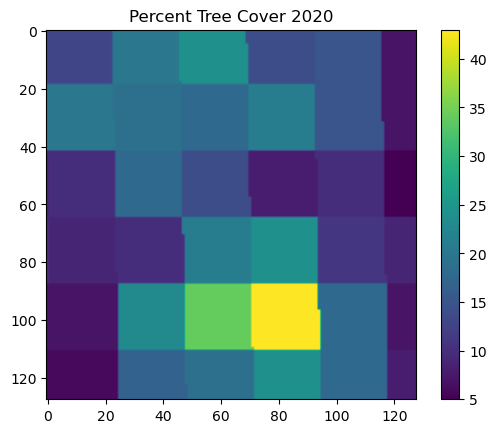

In [92]:
vars = ['Percent_Tree_Cover_2020']

ds = load_tif(veg_path + random_tile)
idx = [list(ds.long_name).index(v) for v in vars]

ds = ds.isel(band=idx)
arr = ds.compute().values
arr = np.moveaxis(arr, 0, -1)

plt.imshow(arr)
plt.colorbar()
plt.title('Percent Tree Cover 2020')